<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.2.2 

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [5]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df = pd.read_csv("housing.data", header=None, names=names, delim_whitespace=True)

In [6]:
# Head
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
# Shape
df.shape

(506, 14)

##### 1. Plot Histogram of `RM`

Text(0.5, 1.0, 'Plot of average number of rooms per dwelling.')

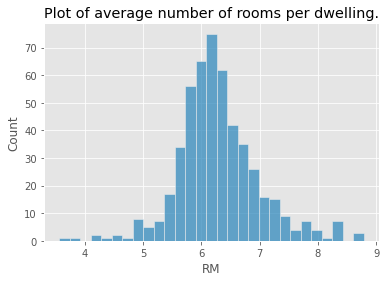

In [48]:
#  ANSWER
sns.histplot(df,x='RM').set_title("Plot of average number of rooms per dwelling.")

##### 2. Plot Histogram of `MEDV`

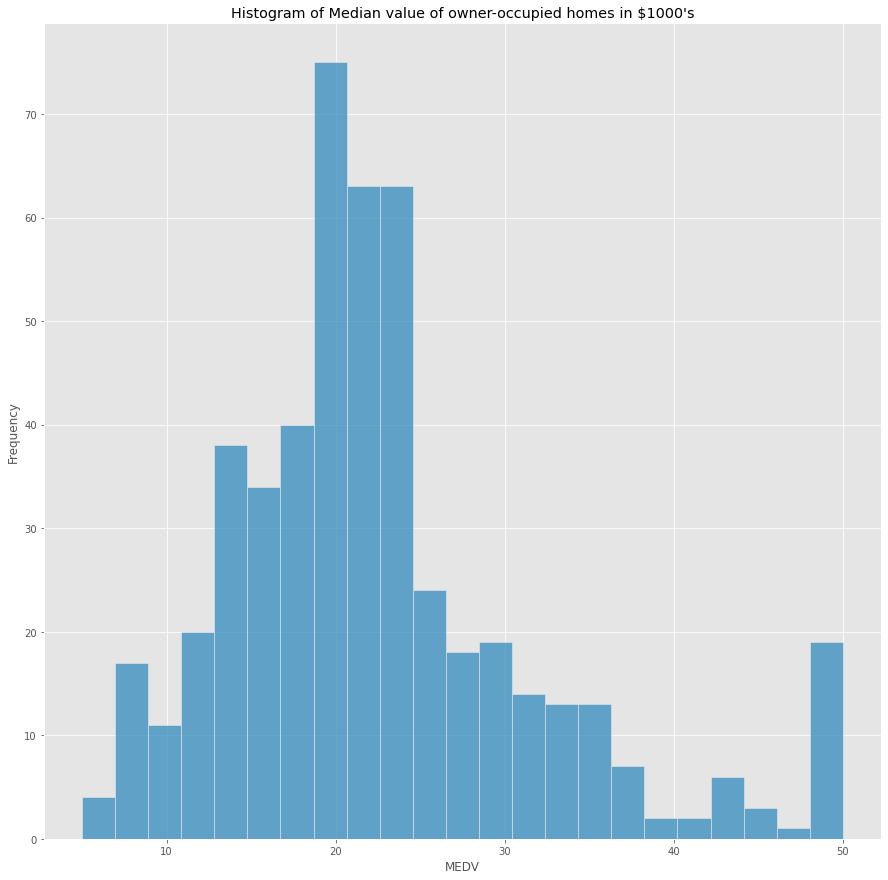

In [56]:
# ANSWER
plt.figure(figsize=(15,15))
ax = sns.histplot(df,x='MEDV').set(ylabel='Frequency',title="Histogram of Median value of owner-occupied homes in $1000's")

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

[Text(0.5, 1.0, "Plot of Median value of owner-occupied homes in $1000's \nagainst average number of rooms per dwelling"),
 Text(0.5, 0, 'Average number of rooms per dwelling'),
 Text(0, 0.5, "Plot of Median value of owner-occupied homes in $1000's")]

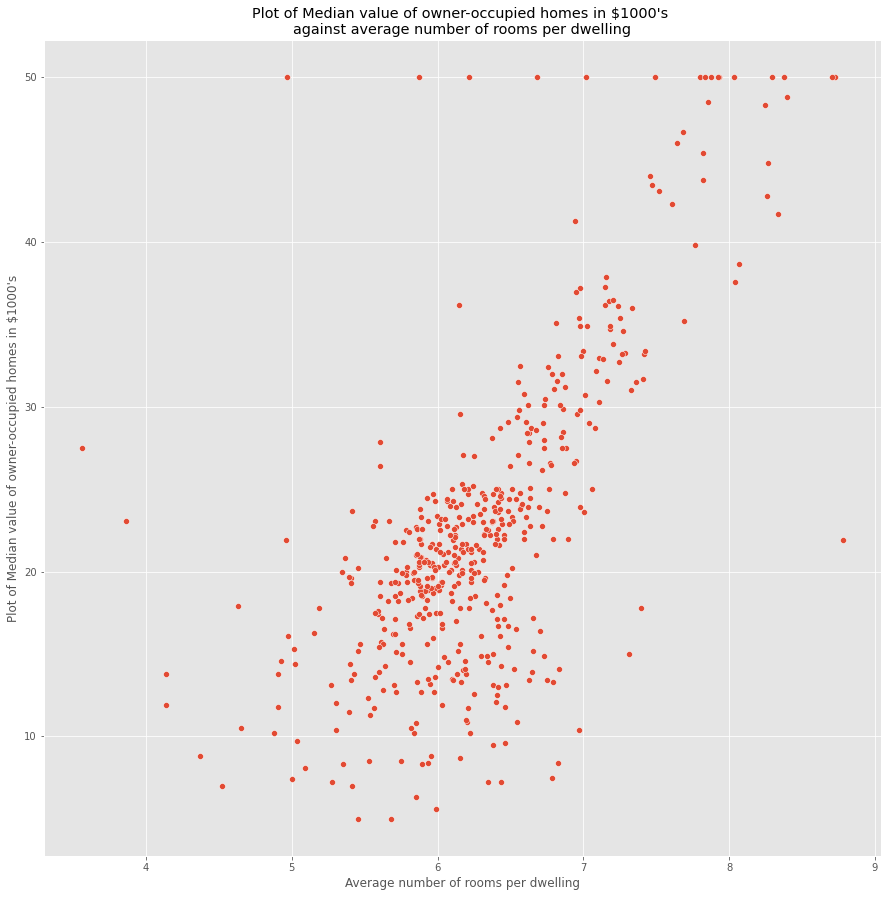

In [65]:
# ANSWER
plt.figure(figsize=(15,15))
sns.scatterplot(x='RM',y='MEDV',data=df).set(title="Plot of Median value of owner-occupied homes in $1000's \nagainst average number of rooms per dwelling",
                                            xlabel='Average number of rooms per dwelling',
                                            ylabel="Plot of Median value of owner-occupied homes in $1000's")

##### 3.B Is there any trend? State your observation.

**ANSWER:**: based on the graph, it seems that there is a positive correlation.

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, they are large house. Other houses are small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference between distribution of `Large House` & `Small House`
    H1: There is difference between distribution of `Large House` & `Small House`
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [66]:
# ANSWER

alpha = 0.05

##### 6. Set Data

Now, let's create two sets of data 
- Large House: House which have more than 6 rooms.
- Small House: House which have less than 6 rooms.

Take sample of 100 house in each dataste.

In [187]:
# ANSWER


rm_large = df[df.RM > 6].sample(100)

rm_small = df[df.RM <= 6].sample(100)
print(rm_small.RAD.mean())
rm_large.RAD.mean()

10.54


8.34

##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

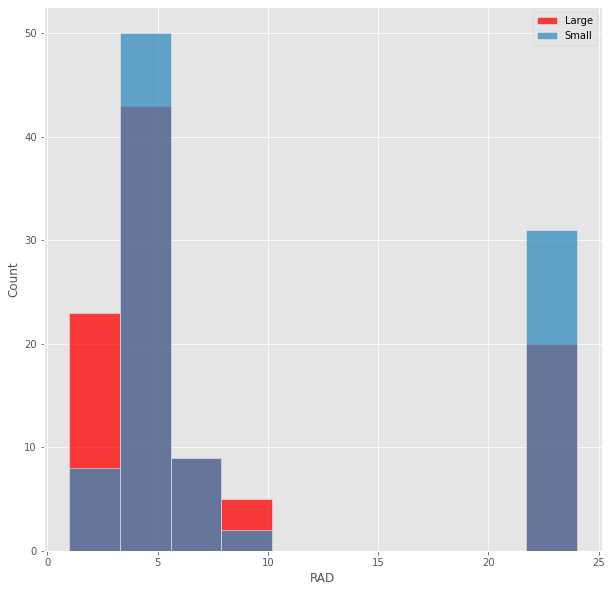

In [188]:
# ANSWER
test_variable = 'RAD'
plt.figure(figsize=(10,10))
sns.histplot(data=rm_large,x=test_variable,color='red',bins=10)
sns.histplot(x=test_variable,data=rm_small,bins=10)
plt.legend(('Large','Small'))

##### 7. Calculate Variance

Calculate variance for both samples.

In [189]:
# ANSWER



small_var = np.var(rm_small[test_variable])

large_var = np.var(rm_large[test_variable])

small_var

82.4084

##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation. 

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [190]:
# ANSWER

sample_std = ((small_var + large_var)/2)**0.5
sample_std

8.543793068655162

##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [230]:
# ANSWER

mean_difference = rm_small[test_variable].mean() - rm_large[test_variable].mean()
denom = sample_std * (2/100)**0.5
test_statistic = mean_difference / denom
test_statistic

1.8207778513709594

##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [194]:
# ANSWER
deg_freedom = len(rm_large) - 1
deg_freedom

99

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t) 

In [231]:
# ANSWER

p_value = 1 - stats.t.cdf(test_statistic,df=deg_freedom)
p_value

0.0358306911375903

#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a funtion which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message. 

In [196]:
# ANSWER

def print_sig(p_value, alpha):
    if p_value <= alpha:
        print("We reject our null hypothesis.")
    else:
        print("We fail to reject our null hypothesis.")


In [197]:
# ANSWER
print(print_sig(p_value,alpha))

We reject our null hypothesis.
None


##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [234]:
# ANSWER

def ind_2_sample(x1_arr,x2_arr,column):
    x1 = x1_arr[column]
    x2 = x2_arr[column]

    n = len(x1)
    x1_var = np.var(x1)
    x2_var = np.var(x2)
    x1_std = x1_var**0.5
    x2_std = x2_var**0.5
    pooled_std = ((x1_std + x2_std) /2)**0.5
    
    mean_difference = np.mean(x1) - np.mean(x2)
    print(np.mean(x2))
    denom = sample_std * (2/100)**0.5
    t_statistic = mean_difference/ denom
    df = n - 1
    
    if t_statistic < 0:
        p_value = stats.t.cdf(t_statistic,df=df)
    else:
        p_value = 1 - stats.t.cdf(t_statistic,df=df)
    
    return t_statistic,p_value
    
    

In [233]:
ind_2_sample(rm_large,rm_small,'RAD')


10.54


(-1.8207778513709594, 0.035830691137590284)

#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [235]:
# ANSWER
stats.ttest_ind(rm_large[test_variable],rm_small[test_variable])

Ttest_indResult(statistic=-1.8116510878760888, pvalue=0.07155536090442612)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



